In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#declaring emotions
emo_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [10]:
#getting the dataset
df=pd.read_csv('C:/Users/MVRAHUL/Downloads/fer2013.csv')#fer2013
#converting pixels from list to numpy array
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype=np.float))

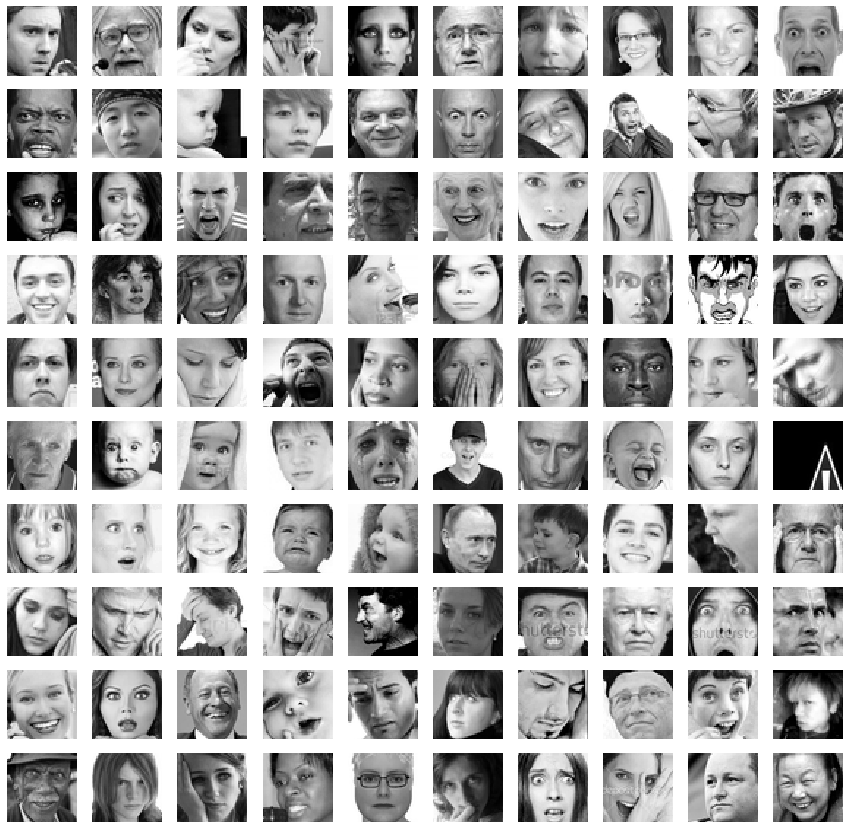

In [12]:
#PLOT!!! visualizing 1st 100 images
def plot_first_100_faces(df):
    plt.figure(figsize=(15, 15))
    for i in range(0, 100):
        plt.subplot(10, 10, i+1)
        data = df['pixels'][i].reshape((48,48)) #48,48
        plt.imshow(data , cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.ylabel('hi')
        plt.axis('off')
        
plot_first_100_faces(df)

In [13]:
from scipy.sparse.linalg import eigs

In [14]:
#function - provides an 2D-array of all pixels corresponding to particular emotion
#by taking input of image pixels and size
def make_image_vector(image_list, new_size):
    D = np.empty([len(image_list), new_size])
    i = 0
    for image in image_list:
        D[i, :] = image
        i += 1
    return D

In [15]:
#function - for each emotion taking avg of all the pixels of that particular emotion
#and returning a tuple of calculated avg_pixels and the corresponding emotion.
def avgfaces_by_emotion(df):
    avgfaces = []
    
    for emotion in sorted(df['emotion'].unique()):
#         print(emotion)
        sub_df = df[df['emotion']==emotion]
#         print(sub_df)
        avg_pixels = np.mean(sub_df['pixels'].values)
#         print(avg_pixels)
        avgfaces.append((avg_pixels, emotion))
        
    return avgfaces

# avgfaces = avgfaces_by_emotion(df)
# print(avgfaces)

In [18]:
#function - provides eigen values and eigen vectors
def eigenfaces_by_emotion(df, k=1):
    eigenfaces = []
    for emotion in sorted(df['emotion'].unique()):
        sub_df = df[df['emotion']==emotion]
        pixels = list(sub_df['pixels'].values)
                                    
        #get 2D-array of all pixels corresponding to particular emotion
        D = make_image_vector(pixels, 48*48) #48*48
        
        #dot product of transpose of D and D
        A = np.dot(D.T, D)
        
        # Find k largest magnitude (LM) eigenvectors
        vals, vecs = eigs(A, k, which='LM')
        
        eigenfaces.extend([(vec.reshape(48,48).astype(float), emotion) for vec in vecs.T]) #48,48
        
    return eigenfaces

# eigenfaces = eigenfaces_by_emotion(df, 1)
# print(eigenfaces)

In [19]:
avgfaces = avgfaces_by_emotion(df)
eigenfaces = eigenfaces_by_emotion(df, 1)

C:\Users\MVRAHUL\Anaconda3\envs\envi\lib\site-packages\ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


In [26]:
# Plot avg/eigen faces and show emotion label
def plot_face_and_emotion(plot_nrow, plot_ncol, face_list):
    fig, axes = plt.subplots(plot_nrow, plot_ncol, figsize=(15,15))
#     fig, axarr = plt.subplots(2,2)
#     axarr[0,0] = plt.imshow(face[0].reshape(48, 48), cmap='gray')
#     axarr[0,1] = plt.imshow(face[1].reshape(48, 48), cmap='gray')
#     axarr[1,0] = plt.imshow(face[2].reshape(48, 48), cmap='gray')
#     axarr[1,1] = plt.imshow(face[3].reshape(48, 48), cmap='gray')
    
    for i, (face, emotion) in enumerate(face_list):
        ax = axes.ravel()[i]
        ax.imshow(face.reshape(48,48), cmap='gray')
        # Turn off tick labels
        ax.set_xlabel(emo_dict[emotion])
        ax.set_yticklabels([])
        ax.set_xticklabels([])

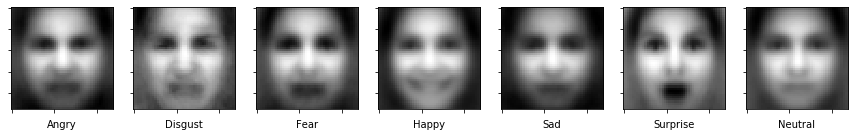

In [27]:
# print(avgfaces)
plot_face_and_emotion(1,7, avgfaces)

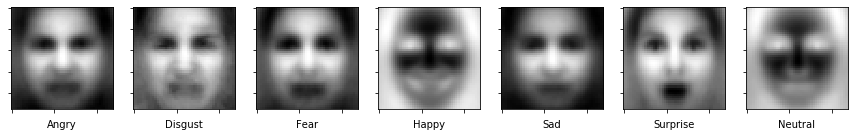

In [28]:
plot_face_and_emotion(1,7, eigenfaces)

In [30]:
#PCA

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [31]:
X = make_image_vector(df['pixels'] , 48*48)#48*48
y = df['emotion'].map(emo_dict).values

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components = 50)
# X_train = kpca.fit_transform(X_train)
# X_test = kpca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)


# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Fitting K-NN to the Training set
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

#  Kernel SVM  ... NOT WORKING! MEMORY ERROR!
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)

# Fitting Random Forest Classification to the Training set
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

[0.29150058 0.09304618 0.09054515 0.05251737 0.02811508 0.02327368
 0.019115   0.01866157 0.01737158 0.01611059 0.01238401 0.01032382
 0.01031433 0.01008244 0.00920942 0.00808213 0.00775832 0.00731341
 0.00585348 0.00568941 0.00554865 0.00541028 0.00513627 0.0050258
 0.0047514  0.00448291 0.00431134 0.00414133 0.00395323 0.0038246
 0.00347257 0.00345476 0.00333416 0.00322963 0.00304886 0.00288478
 0.00283504 0.00281874 0.00262092 0.00258133 0.00249506 0.00240651
 0.00231676 0.00227234 0.00209406 0.00207914 0.00203743 0.00194412
 0.00187243 0.0018579 ]


C:\Users\MVRAHUL\Anaconda3\envs\envi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MVRAHUL\Anaconda3\envs\envi\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Predicting the Test set results #random_forest
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score, classification_report 
print('\nAccuracy Score :',accuracy_score(y_test, y_pred))
print('\nReport :', classification_report(y_test, y_pred))

[[ 104    0   67  507  180  240  116]
 [   5    0    7   60   21   20   15]
 [  65    0  106  483  201  213  200]
 [  53    0   63 1690  158  224   96]
 [  36    0   67  538  523  233  117]
 [  72    0   72  576  291  461   98]
 [  17    0   49  236  105  100  487]]

Accuracy Score : 0.3757244761480161


C:\Users\MVRAHUL\Anaconda3\envs\envi\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Report :               precision    recall  f1-score   support

       Angry       0.30      0.09      0.13      1214
     Disgust       0.00      0.00      0.00       128
        Fear       0.25      0.08      0.12      1268
       Happy       0.41      0.74      0.53      2284
     Neutral       0.35      0.35      0.35      1514
         Sad       0.31      0.29      0.30      1570
    Surprise       0.43      0.49      0.46       994

    accuracy                           0.38      8972
   macro avg       0.29      0.29      0.27      8972
weighted avg       0.34      0.38      0.33      8972



In [58]:
# p = Pipeline([
#         ('scale', StandardScaler()),
#         ('pca', PCA(n_components=10)),
#         ('classifier', LogisticRegression())
#         ])
# p.fit_transform(X, y)
# p.score(X, y)

In [18]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


# pca = PCA(n_components=10)
# X_pca = pca.fit_transform(X_scaled)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_pca, y)


# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)



# Predicting the Test set results
import cv2
full_size_image = cv2.imread("test1.jpg")
# grayy=cv2.cvtColor(full_size_image,cv2.COLOR_RGB2GRAY)

face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face.detectMultiScale(full_size_image)

# gray2 = make_image_vector(full_size_image, 48*48)
# cropped_img = np.expand_dims(np.expand_dims(cv2.resize(grayy, (48, 48)), -1), 0)
# crop_img = img[y:y+h, x:x+w]

for (x,y,w,h) in faces:
    cropim = full_size_image[y:y+h, x:x+w]
    grayy = cv2.cvtColor( cropim , cv2.COLOR_RGB2GRAY )
    
    trans_grayy = pca.transform(gray2)
    y_pred = classifier.predict(trans_grayy)
    
# print(X_pca)
# print(y_pred)

In [37]:
def scree_plot(pca, title=None):
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.bar(ind, vals, 0.35,
           color=[(0.949, 0.718, 0.004),
                  (0.898, 0.49, 0.016),
                  (0.863, 0, 0.188),
                  (0.694, 0, 0.345),
                  (0.486, 0.216, 0.541),
                  (0.204, 0.396, 0.667),
                  (0.035, 0.635, 0.459),
                  (0.486, 0.722, 0.329),
                 ])

    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.set_xticklabels(ind,
                       fontsize=12)

    ax.set_ylim(0, max(vals)+0.05)
    ax.set_xlim(0-0.45, 8+0.45)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    if title is not None:
        plt.title(title, fontsize=16)

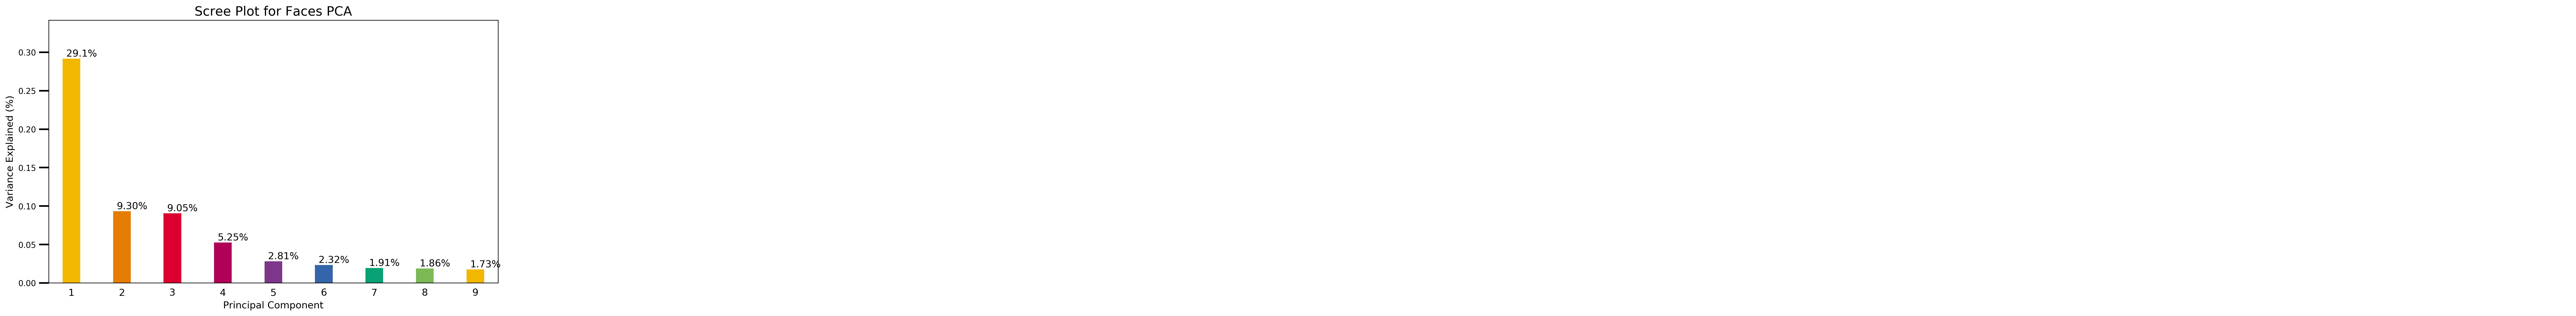

In [38]:
scree_plot(pca, title="Scree Plot for Faces PCA")